In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

names = {
    't': 'Latest: Time (s)',
    's1':'Latest: GateState 1',
    's2':'Latest: GateState 2'
}

In [4]:
df = pd.read_csv('../data/partB/try5.csv')

In [5]:
df

,Latest: Time (s),Latest: GateState 1,Latest: Distance 1 (m),Latest: Velocity 1 (m/s),Latest: Acceleration 1 (m/s²),Latest: GateState 2,Latest: Distance 2 (m),Latest: Velocity 2 (m/s),Latest: Acceleration 2 (m/s²)
0,1.881494,1.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN
1,1.888620,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.896879,1.0,0.05,NaN,NaN,NaN,NaN,NaN,NaN
3,1.903849,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.989536,NaN,NaN,NaN,NaN,1.0,0.00,NaN,NaN
5,1.996318,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
6,2.003333,NaN,NaN,NaN,NaN,1.0,0.05,NaN,NaN
7,2.010097,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [6]:
(1e-2/(2.010097-2.003333) - 1e-2/(1.996318-1.989536))/(2.003333-1.989536)

0.28439794663419493

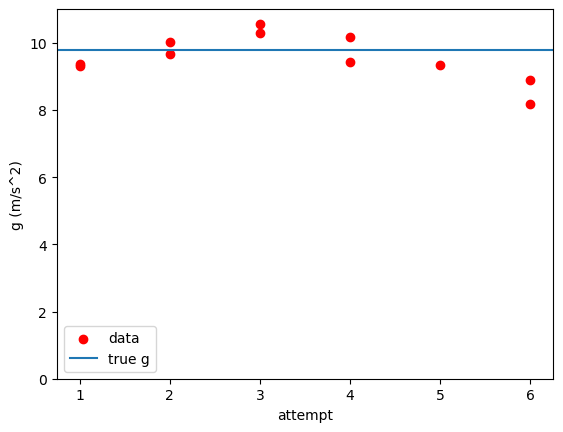

In [7]:
masses = [
        [217.3,20],
        [217.3,30.3],
        [217.3,48.7],
        [317.3,68.8],
        [317.5,88.9],
        [317.5,20]
    ]

dm = 0.1
dM = 0.1

g_values = []
a_values = []
m_values = []

for i in range(1,7):

    number = i
    
    df = pd.read_csv(f"../data/partB/try{number}.csv")
    
    l = 1e-2
    start1 = 0
    stop1 = 1
    start2 = 2
    stop2 = 3
    v1 = l/(df[names['t']][stop1]-df[names['t']][start1])
    v2 = l/(df[names['t']][stop2]-df[names['t']][start2])
    dt1 = df[names['t']][start2]-df[names['t']][start1]
    
    start3 = 4
    stop3 = 5
    start4 = 6
    stop4 = 7
    v3 = l/(df[names['t']][stop3]-df[names['t']][start3])
    v4 = l/(df[names['t']][stop4]-df[names['t']][start4])
    dt2 = df[names['t']][start4]-df[names['t']][start3]
    
    a1 = (v2-v1)/dt1
    a2 = (v4-v3)/dt2
    M = masses[number-1][0]
    m = masses[number-1][1]

    m_values.append(m/(M+m))
    
    g1 = ((M+m)/m)*a1
    g2 = ((M+m)/m)*a2

    # error analysis
    dg_da = (M + m) / m
    dg_dM1 = a1 / m
    dg_dm1 = -a1 * M / (m ** 2)
    dg_dM2 = a2 / m
    dg_dm2 = -a2 * M / (m ** 2)

    da = 0.1

    dg1 = np.sqrt((dg_da * da)**2 + (dg_dM1 * dM)**2 + (dg_dm1 * dm)**2)
    dg2 = np.sqrt((dg_da * da)**2 + (dg_dM1 * dM)**2 + (dg_dm1 * dm)**2)

    if g1 > 8:
        plt.scatter(number,g1,color='red',label='data')
        # g_values.append(g1)
    if g2 > 8:
        plt.scatter(number,g2,color='red',label='data')
        g_values.append((g1+g2)/2)
        a_values.append((a1+a2)/2)
    else:
        g_values.append(g1)
        a_values.append(a1)
        

plt.xlabel('attempt')
plt.ylabel('g (m/s^2)')
plt.axhline(9.79,label='true g')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.ylim(0,11)
plt.show()

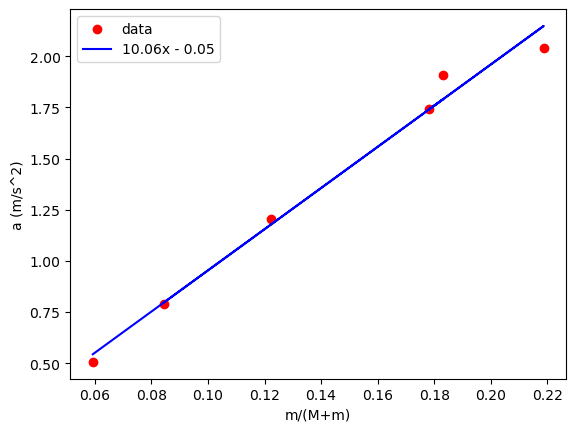

9.546997705267934


(10.060852054482682, -0.05271983044410744)

In [14]:
m_values = np.array(m_values)
a_values = np.array(a_values)
g_values = np.array(g_values)
plt.scatter(m_values,a_values,color='red',label='data')
plt.xlabel('m/(M+m)')
plt.ylabel('a (m/s^2)')
m,c = np.polyfit(m_values,a_values,1)
plt.plot(m_values,m*m_values+c,color='blue',label=f'{round(m,2)}x - {round(abs(c),2)}')
plt.legend()
plt.show()
print(np.mean(g_values))
m,c

In [15]:
print(100*(9.546997705267934-9.79)/9.79, 'for mean')
print(100*(10.06-9.79)/9.79, 'for line')

-2.482148056507305 for mean
2.7579162410623224 for line
